<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 60px; display: inline" alt="SizingLab" /></a>

# Scaling laws of electrical components

*Written by Marc Budinger, INSA Toulouse, France*

The estimation models calculate the component characteristics requested for their selection without requiring a detailed design. Scaling laws are particularly suitable for this purpose. This notebook illustrates the approach with electrical drone components characteristics.
Validation of the obtained scaling laws is realized thanks catalog data.  

The [following article](https://hal.archives-ouvertes.fr/hal-00712986/file/IMECHE_v1.2_full.pdf) gives more details for components of electromechanical actuators:  
>*Budinger, M., Liscouët, J., Hospital, F., & Maré, J. C. (2012). Estimation models for the preliminary design of electromechanical actuators. Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering, 226(3), 243-259.*  

**Notation**: The x* scaling ratio of a given parameter is calculated as $x^*=\frac{x}{x_{ref}}$ where $x_{ref}$ is the parameter taken as the reference and $x$ the parameter under study.

### Lipo battery

A lithium-ion polymer battery (abbreviated as LiPo) is a assembly of elementary cells. The more the cells are provided, the bigger is the power and stored energy. The following figure gives an example of a Lipo battery with the following characteristics:
* **Voltage / Cell Count ("S")**: A LiPo cell has a nominal voltage of 3.7V (3V min, 4.2V max) . For the 7.4V battery above, this means that there are two cells in series (which means the voltage gets added together). This is sometimes why you will hear people talk about a "2S" battery pack - it means that there are 2 cells in Series. 
* **Capacity ("C")**: The capacity of a battery is basically a measure of the energy the battery can hold. The unit of measure here is milliamp hours (mAh). This is saying how much drain can be put on the battery to discharge it in one hour. The stored energy is given by the the product of voltage and thus here: Capacity (in Amps)*3600*7.4= 0.133 MJ 
* **Discharge Rating ("C" Rating)**: The C Rating is simply a measure of how fast the battery can be discharged safely and without harming the battery. The maximum safe continuous amp draw is here: 50C = 50 x Capacity (in Amps) = 250 A.

![LipoBattery](./pictures/LipoBattery.jpeg)

> **Exercice:** Propose a scaling law which links battery characteristics, as mass or max discharge current, to capacity $C_{bat}$ and voltage $V_{bat}$. Estimate the mass and max discharge current for a 3300 mAh - 4S battery knowing the following reference component:   

Characteristic | Value
--|--
Capacity | 5000mAh
Continuous discharge rate | 50C
Burst rate  | 100C
Voltage | 7.4V
Cells | 2S
Size (LxWxH) | 155x48x16mm
Weight | 273g 


**Answer**:   

To be completed


In [4]:
# Reference battery 5000mAh 2S 50C ?P
C_bat_ref=5 # [Ah] Capacity
I_bat_max_ref=50*C_bat_ref # [A] max discharge current
V_bat_ref=7.4 # [V] nominal voltage
M_bat_ref=.273 # [kg] mass

# New battery 3300 mA.h 4S ?P
V_bat = (V_bat_ref/2) * 4 # [V]
C_bat = 3.3 # [Ah]
I_bat_max = 50 * C_bat # The maximum safe continuous amp draw is here: 50C = 50 x Capacity (in Amps) = 250 A.

M_bat = M_bat_ref * (V_bat/V_bat_ref) * (C_bat/C_bat_ref)
# ...

print("Battery mass: %.3f kg"%M_bat)
print("Max discharge current: %.0f A"%I_bat_max)

Battery mass: 0.360 kg
Max discharge current: 165 A


## Brushless motor

Multi-rotor drones use out runner brushless motors which are permanent magnet synchronous motors. The [following article](https://hal.archives-ouvertes.fr/hal-00712986/file/IMECHE_v1.2_full.pdf) explains how set up the scaling laws for this technology of component. 

![Brushless motor](./pictures/BrushlessMotor.jpg)

#### Scaling laws

The following table summarize the scaling laws which can be used for the brushless motors.

|                 | Scaling laws            | References |
| --------------  | ------------------------| -----------|
|                 |                               |  AXI 2217/20       |
| Nominal torque  | $T_{nom}^*$                   | $0.151$ N.m |
| Torque constant |$K^*$                          | $1.14.10^{-2}$ N.m/A |
| Max torque      | $T_{max}^*=T_{nom}^*$         | $0.198$ N.m |
| Friction torque | $T_{fr}^*=T_{nom}^{*3/3.5}$   | $6.25.10^{-3}$ N.m |
| Mass            | $M^*=T_{nom}^{*3/3.5}$        | $69.5$ g |
| Resistance      | $R^*=K^{*2}T_{nom}^{*-5/3.5}$ | $0.185$ ohm  |
| Inertia         | $J^*=T_{nom}^{*-5/3.5}$       | $2.5.10^{-5}$ kg.m² |



In [5]:
# Motor reference data: AXI 2217/20 GOLD LINE
T_mot_ref=0.15 # [N.m] motor nominal torque
M_mot_ref=69.5e-3 # [kg] motor mass
R_mot_ref=0.185 # [Ohm] motor resistance
K_mot_ref=1.14e-2 # [N.m/A] Torque or fem constant

>**Question**: Explain how to find the mass scaling laws. Give the main assumptions and demonstrate the relationship.

**Answer:**
Mass scaling law with lengths:

$L^* = \frac{L}{L_{ref}}$

$M = \rho Vol $

$Vol^* = (L^*)^3$

$M^* = Vol^* = (L^*)^3$

Resistance scaling law with lengths:

$R_{th} = \frac{1}{hS}$, first assumption $h=1$.

$R_{th}^* = (L^*)^{-2}$

Temperature scaling law with lengths:

$P_J = R_{motor}I^2$

$P_J^* = (J^*)^2 (L^*)^3$ 

$\theta = R_{th}P_J$

$\theta^* = R_{th}^* P_J^* = (L^*)^{-2} (J^*)^2 (L^*)^3 = L^* (J^*)^2$, second assumption $\theta^* = 1$, because the temperature is same in the two models.

Third assumption, $B^* = 1$, because the magnetic fields in the motors is the same the magnetic material is the same in two models.

$T^*_{mot} = J^* B^* (L^*)^4 = (L^*)^{3,5}$

So,

$L^* =  (T^*_{mot})^{\frac{1}{3,5}} = (M^*)^{\frac{1}{3}}$

$M^* = (T^*_{mot})^{\frac{3}{3,5}}$




## Validation with a data plot

We will compare the scaling law with a plot on catalog data. 

#### Import data

The first step is to import catalog data stored in a excel file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

In [7]:
# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='./data/'
df = pd.read_excel(path+'AXI_mot_db_student.xlsx')
# Print the head (first lines of the file)
df.head()

,Name,Kv (rpm/v),Pole (number),Io (A),r (omn),weight (g),Imax (A),No s,Voltage,Inom_max (A),Eta_max (%),Kt (N.m/A),Tnom (N.m),Unnamed: 13
0,AXI 2203/40VPP GOLD LINE,2000.0,14.0,0.50,0.245,17.5,9.0,2.0,7.4,7.5,75.0,0.004775,0.033423,NaN
1,AXI 2203/46 GOLD LINE,1720.0,14.0,0.50,0.285,18.5,8.5,2.0,7.4,7.0,75.0,0.005552,0.036087,NaN
2,AXI 2203/52 GOLD LINE,1525.0,14.0,0.40,0.390,18.5,7.0,2.0,7.4,5.5,74.0,0.006262,0.031935,NaN
3,AXI 2203/RACE GOLD LINE,2300.0,14.0,0.55,0.220,18.5,9.0,3.0,11.1,7.5,74.0,0.004152,0.028855,NaN
4,AXI 2204/54 GOLD LINE,1400.0,14.0,0.35,0.320,25.9,7.5,3.0,11.1,6.0,77.0,0.006821,0.038538,NaN


##### Plot data: Mass

We can now compare graphically the catalog data with scaling law:
- blue points, catalog data
- red line, scaling law
- red point, the reference for scaling law.

For the plot, we use the [matplotlib](https://matplotlib.org/) package.

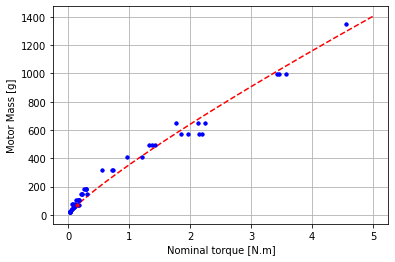

In [9]:
import numpy as np
import matplotlib.pyplot as plt

T_mot=np.logspace(np.log10(0.01), np.log10(5), num=50)

# Scaling law
M_mot=M_mot_ref*(T_mot/T_mot_ref)**(3/3.5)

# plot
h, ax = plt.subplots(1,1,sharex=True)
ax.plot(df['Tnom (N.m)'],df['weight (g)'],'.b')
ax.plot(T_mot, M_mot*1000, '--r',df['Tnom (N.m)'],df['weight (g)'],'.b', T_mot_ref, M_mot_ref*1000, '.r')
ax.set_ylabel('Motor Mass [g]')
ax.set_xlabel('Nominal torque [N.m]')
ax.grid()

##### Plot data: Resistance

We want now to compare graphically the catalog data with scaling law calculations for the resistance value:
- blue points, catalog data
- red point, the estimated data

>**Exercice**: Implement the corresponding python code.

$R^*=K^{*2}T_{nom}^{*-5/3.5}$

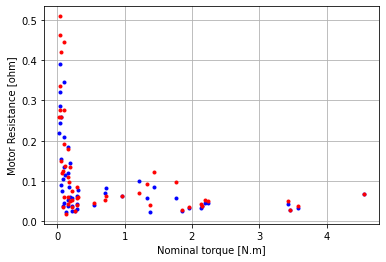

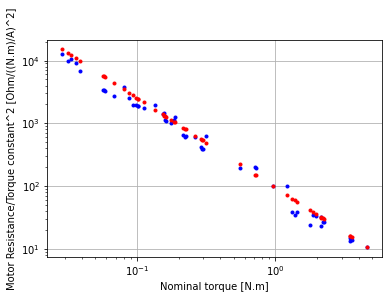

In [30]:
# Resistance plot 

# Scaling law
T_mot_data=df['Tnom (N.m)'].values
K_mot_data=df['Kt (N.m/A)'].values
R_mot_data=df['r (omn)'].values

# Scaling law
R_mot = R_mot_ref * (K_mot_data/K_mot_ref)**2 * (T_mot_data/T_mot_ref)**(-5/3.5)

# plot x=T_mot y=R_mot
h, ax = plt.subplots(1,1,sharex=True)
ax.plot(T_mot_data, R_mot_data, '.b', T_mot_data,R_mot,'.r')
ax.set_ylabel('Motor Resistance [ohm]')
ax.set_xlabel('Nominal torque [N.m]')
ax.grid()

# plot x=T_mot y=R_mot/K_mot^2
h, ax = plt.subplots(1,1,sharex=True)
ax.loglog(T_mot_data, R_mot_data/K_mot_data**2, '.b', T_mot_data,R_mot/K_mot_data**2,'.r')
ax.set_ylabel('Motor Resistance/Torque constant^2 [Ohm/((N.m)/A)^2]')
ax.set_xlabel('Nominal torque [N.m]')
ax.grid()

#### Power electronic converter

ESC (electronic speed controllers) motor controllers are mainly DC/AC converter (inverter) composed of power electronic switchs (Mosfet transistors). We will use here a simple linear regression in order to set up a model for mass estimation.

![ESC](./pictures/ESC.jpeg)




The first step is to import catalog data stored in a .csv file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)).  
The data base gives informations about mass, voltage & current (DC side) and power of the converter.

In [31]:
# Panda package Importation
import pandas as pd

# Read the .csv file with bearing data
path='./data/'
df = pd.read_csv(path+'ESC_data.csv', sep=';')

# Print the head (first lines of the file) of the following columns

df.head()


,Model,Imax.in[A],m[g],Vmax.in[V],Pmax.in[W]
0,Jive 80+ LV,80,84.0,22.2,1776
1,Jive 100+ LV,100,92.0,22.2,2220
2,FAI Jive 150+ LV,150,140.0,18.5,2775
3,Jive 60+ HV,60,84.0,44.4,2664
4,Jive 80+ HV,80,84.0,44.4,3552


In [34]:
df

,Model,Imax.in[A],m[g],Vmax.in[V],Pmax.in[W]
0,Jive 80+ LV,80,84.0,22.2,1776
1,Jive 100+ LV,100,92.0,22.2,2220
2,FAI Jive 150+ LV,150,140.0,18.5,2775
3,Jive 60+ HV,60,84.0,44.4,2664
4,Jive 80+ HV,80,84.0,44.4,3552
...,...,...,...,...,...
69,Turnigy Plush 60,60,75.0,22.2,1332
70,Turnigy Plush 30,30,55.0,14.8,444
71,Turnigy Trust 70,70,79.0,22.2,1554
72,Turnigy Trust 55,55,79.0,22.2,1221


Here we recover the information of power, mass and voltage and we render them on a scatter plot.

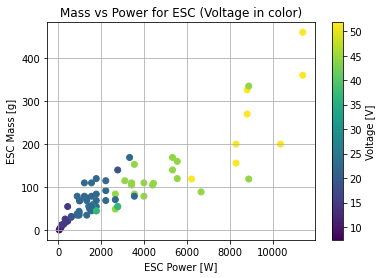

In [32]:
# Get values from panda data 
x=df['Pmax.in[W]'].values
y=df['m[g]'].values
v=df['Vmax.in[V]'].values

# plot the data : scatter plot
plt.scatter(x, y, c=v, cmap='viridis')
cbar=plt.colorbar();  # show color scale
plt.xlabel('ESC Power [W]')
plt.ylabel('ESC Mass [g]')
cbar.set_label('Voltage [V]')
plt.title('Mass vs Power for ESC (Voltage in color)')
plt.grid()
plt.show()

The voltage increases with the power in order to maintain reasonable current values. 

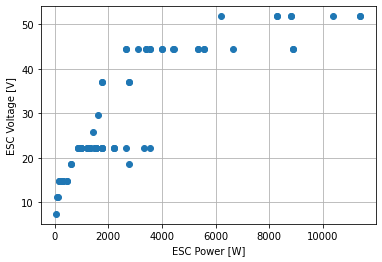

In [33]:
# plot the data : Voltage vs Power
plt.plot(x,v, 'o')
plt.xlabel('ESC Power [W]')
plt.ylabel('ESC Voltage [V]')
plt.grid()
plt.show()

The use of a Ordinary Least Square linear regression (with the [StatsModels](https://www.statsmodels.org/stable/index.html) package) enables to generate simple mass and voltage estimation models. 

Parameters:  [0.02876598]
R2:  0.8870547413373204


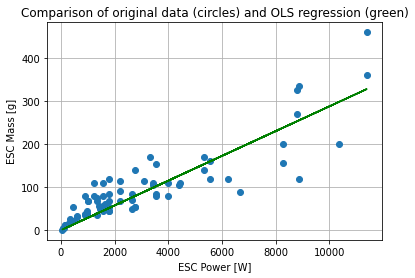

Mass / Power coefficient : 2.88e-02 [g/W] or 2.88e-05 [kg/W] 


In [35]:
# Determination of the least squares estimator with the OLS function 
# of the SatsModels package

import statsmodels.api as sm

# Matrix X and Y

#X=np.transpose(np.array((np.ones(np.size(x)), x)))
X=np.transpose(np.array(x))
Y=y.reshape((np.size(x),1))

model = sm.OLS(Y, X)
results = model.fit()

print('Parameters: ', results.params)
print('R2: ', results.rsquared)

# Y vector prediction
y_OLS=results.predict(X)

# plot the data 
plt.plot(x,y, 'o',x,y_OLS, '-g')
plt.xlabel('ESC Power [W]')
plt.ylabel('ESC Mass [g]')
plt.title('Comparison of original data (circles) and OLS regression (green)')
plt.grid()
plt.show()

print("Mass / Power coefficient : %.2e [g/W] or %.2e [kg/W] "%(results.params[0],results.params[0]/1000))

> **Exercice**: Explain how the following code gives a power law which can represent the evolution of voltage with power. Complete the code with a print of the final relationship. 

Parameters:  [0.26597404 0.36024037]
R2:  0.8870547413373204


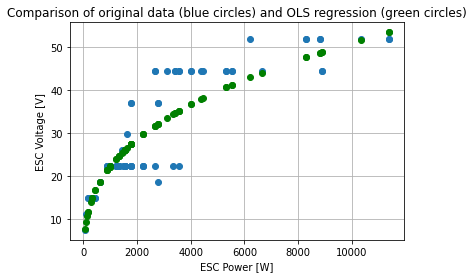

Voltage (Power): log(ESC_V) = 2.66e-01 + 3.60e-01 * log(ESC_P)
Voltage (Power): ESC_V = 1.84e+00 ESP_P ^(3.60e-01)
where Voltage ESC_V [V] and Power ESC_P [W]


In [49]:
# Matrix X and Y

#X=np.transpose(np.array((np.ones(np.size(x)), x)))
one_vect=np.ones(np.size(x)).reshape(np.size(x),1)
X_vect=np.log10(x).reshape(np.size(x),1)

XV=np.concatenate((one_vect, X_vect), axis=1)
YV=np.log10(v).reshape((np.size(x),1))

modelV = sm.OLS(YV, XV)
resultsV = modelV.fit()

print('Parameters: ', resultsV.params)
print('R2: ', results.rsquared)

# Y vector prediction
yV_OLS=10**(resultsV.predict(XV))

# plot the data 
plt.plot(x,v, 'o',x,yV_OLS, 'og')
plt.xlabel('ESC Power [W]')
plt.ylabel('ESC Voltage [V]')
plt.title('Comparison of original data (blue circles) and OLS regression (green circles)')
plt.grid()
plt.show()

# Final part to be completed
print("Voltage (Power): log(ESC_V) = %.2e + %.2e * log(ESC_P)"%(resultsV.params[0], resultsV.params[1]))
print("Voltage (Power): ESC_V = %.2e ESP_P ^(%.2e)"%(10**resultsV.params[0], resultsV.params[1]))
print("where Voltage ESC_V [V] and Power ESC_P [W]")

**Remark aubout the mass evolution of ESC**:   
The *conduction losses* occurring in a MOS switch are given by the following expression:  
$P_{loss,MOS}=R_{ds,on}.I^2$  
In case of a MOS, the resistance $R_{ds,on}$ which defines the conduction losses decreases inversely proportionally to the current calibration. We have thus with the scaling law notation:  
$P_{loss,MOS}^*=I^*$  
Which gives if the voltage is approximated by $V^*\approx P*^{1/3}$:  
$P_{loss,MOS}^* \approx P^{*2/3}$  
with $P$ the converter power.

The *heat exchange* of the converter shall ensure a constant temperature for the entire power range of a given line of converters. It is assumed that the dissipation is fixed here by forced convection (due to propeller air flow) which can be expressed finally with converter dimension $d^*$ by:   
$P_{conv}^* = h^* S^* \Delta \theta^*= d^{*2} $  
and as $P_{conv}^*=P_{loss,MOS}^*$, we have $d^*=P^{*1/3}$ and thus a mass evolution express by the following linear trend can be deduced:  
$M^*=d^{*3}=P^*$  

